## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  68.202461  1167.272445  0.710804  2.344604  1.642589
1  95.296780   676.686409  0.359256  4.586383  1.240448
2  81.552300   785.088555  0.918763  1.967059  1.388667
3  46.750095  1096.091442  0.214102  5.315488  1.426157
4  22.375799  1631.513999  0.501744  1.402220  1.522967


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9525177	total: 69.2ms	remaining: 1m 9s
1:	learn: 0.9418742	total: 69.8ms	remaining: 34.8s
2:	learn: 0.9345405	total: 70.4ms	remaining: 23.4s
3:	learn: 0.9278233	total: 71.1ms	remaining: 17.7s
4:	learn: 0.9186226	total: 71.6ms	remaining: 14.2s
5:	learn: 0.9099065	total: 72.1ms	remaining: 11.9s
6:	learn: 0.9028109	total: 72.5ms	remaining: 10.3s
7:	learn: 0.8944526	total: 73ms	remaining: 9.05s
8:	learn: 0.8865138	total: 73.5ms	remaining: 8.09s
9:	learn: 0.8786166	total: 74ms	remaining: 7.33s
10:	learn: 0.8722580	total: 74.6ms	remaining: 6.71s
11:	learn: 0.8643841	total: 75.1ms	remaining: 6.18s
12:	learn: 0.8572684	total: 75.6ms	remaining: 5.74s
13:	learn: 0.8487289	total: 75.9ms	remaining: 5.35s
14:	learn: 0.8411447	total: 76.5ms	remaining: 5.02s
15:	learn: 0.8322255	total: 76.9ms	remaining: 4.73s
16:	learn: 0.8254464	total: 77.2ms	remaining: 4.46s
17:	learn: 0.8193784	total: 77.7ms	remaining: 4.24s
18:	learn: 0.8128280	total: 78.2ms	remaining: 4.

89:	learn: 0.4775501	total: 108ms	remaining: 1.1s
90:	learn: 0.4737090	total: 109ms	remaining: 1.09s
91:	learn: 0.4710028	total: 109ms	remaining: 1.08s
92:	learn: 0.4677952	total: 110ms	remaining: 1.07s
93:	learn: 0.4646516	total: 110ms	remaining: 1.06s
94:	learn: 0.4619454	total: 111ms	remaining: 1.05s
95:	learn: 0.4589865	total: 111ms	remaining: 1.04s
96:	learn: 0.4566475	total: 111ms	remaining: 1.04s
97:	learn: 0.4538479	total: 112ms	remaining: 1.03s
98:	learn: 0.4512825	total: 112ms	remaining: 1.02s
99:	learn: 0.4491747	total: 113ms	remaining: 1.01s
100:	learn: 0.4459383	total: 113ms	remaining: 1s
101:	learn: 0.4437382	total: 113ms	remaining: 998ms
102:	learn: 0.4409676	total: 114ms	remaining: 990ms
103:	learn: 0.4388832	total: 114ms	remaining: 983ms
104:	learn: 0.4364223	total: 114ms	remaining: 975ms
105:	learn: 0.4339702	total: 115ms	remaining: 969ms
106:	learn: 0.4309677	total: 115ms	remaining: 962ms
107:	learn: 0.4284919	total: 116ms	remaining: 956ms
108:	learn: 0.4256250	total

268:	learn: 0.2075255	total: 187ms	remaining: 508ms
269:	learn: 0.2070494	total: 187ms	remaining: 506ms
270:	learn: 0.2067043	total: 188ms	remaining: 505ms
271:	learn: 0.2060610	total: 188ms	remaining: 503ms
272:	learn: 0.2053590	total: 188ms	remaining: 502ms
273:	learn: 0.2048151	total: 189ms	remaining: 500ms
274:	learn: 0.2044882	total: 189ms	remaining: 499ms
275:	learn: 0.2039123	total: 190ms	remaining: 498ms
276:	learn: 0.2035402	total: 190ms	remaining: 497ms
277:	learn: 0.2029322	total: 191ms	remaining: 495ms
278:	learn: 0.2024068	total: 191ms	remaining: 494ms
279:	learn: 0.2009997	total: 192ms	remaining: 493ms
280:	learn: 0.2003606	total: 192ms	remaining: 491ms
281:	learn: 0.1996163	total: 192ms	remaining: 490ms
282:	learn: 0.1991461	total: 193ms	remaining: 489ms
283:	learn: 0.1982854	total: 193ms	remaining: 488ms
284:	learn: 0.1978178	total: 194ms	remaining: 486ms
285:	learn: 0.1974801	total: 194ms	remaining: 485ms
286:	learn: 0.1970224	total: 195ms	remaining: 484ms
287:	learn: 

504:	learn: 0.1069711	total: 291ms	remaining: 285ms
505:	learn: 0.1065859	total: 291ms	remaining: 284ms
506:	learn: 0.1063011	total: 292ms	remaining: 284ms
507:	learn: 0.1060646	total: 292ms	remaining: 283ms
508:	learn: 0.1057442	total: 293ms	remaining: 282ms
509:	learn: 0.1054309	total: 293ms	remaining: 282ms
510:	learn: 0.1049174	total: 293ms	remaining: 281ms
511:	learn: 0.1045419	total: 294ms	remaining: 280ms
512:	learn: 0.1043471	total: 295ms	remaining: 280ms
513:	learn: 0.1040707	total: 295ms	remaining: 279ms
514:	learn: 0.1036591	total: 296ms	remaining: 278ms
515:	learn: 0.1033890	total: 296ms	remaining: 278ms
516:	learn: 0.1031996	total: 296ms	remaining: 277ms
517:	learn: 0.1029354	total: 297ms	remaining: 276ms
518:	learn: 0.1026803	total: 297ms	remaining: 276ms
519:	learn: 0.1024320	total: 298ms	remaining: 275ms
520:	learn: 0.1022570	total: 298ms	remaining: 274ms
521:	learn: 0.1016968	total: 299ms	remaining: 274ms
522:	learn: 0.1015122	total: 299ms	remaining: 273ms
523:	learn: 

684:	learn: 0.0629298	total: 369ms	remaining: 170ms
685:	learn: 0.0628184	total: 370ms	remaining: 169ms
686:	learn: 0.0626768	total: 370ms	remaining: 169ms
687:	learn: 0.0625415	total: 370ms	remaining: 168ms
688:	learn: 0.0624128	total: 371ms	remaining: 167ms
689:	learn: 0.0623033	total: 371ms	remaining: 167ms
690:	learn: 0.0621683	total: 372ms	remaining: 166ms
691:	learn: 0.0619427	total: 372ms	remaining: 165ms
692:	learn: 0.0618116	total: 372ms	remaining: 165ms
693:	learn: 0.0616806	total: 373ms	remaining: 164ms
694:	learn: 0.0615517	total: 373ms	remaining: 164ms
695:	learn: 0.0613259	total: 374ms	remaining: 163ms
696:	learn: 0.0612185	total: 374ms	remaining: 163ms
697:	learn: 0.0610446	total: 374ms	remaining: 162ms
698:	learn: 0.0608964	total: 375ms	remaining: 161ms
699:	learn: 0.0607611	total: 375ms	remaining: 161ms
700:	learn: 0.0606276	total: 376ms	remaining: 160ms
701:	learn: 0.0605798	total: 376ms	remaining: 160ms
702:	learn: 0.0604223	total: 376ms	remaining: 159ms
703:	learn: 

923:	learn: 0.0372753	total: 473ms	remaining: 38.9ms
924:	learn: 0.0371870	total: 473ms	remaining: 38.4ms
925:	learn: 0.0371318	total: 474ms	remaining: 37.8ms
926:	learn: 0.0370672	total: 474ms	remaining: 37.3ms
927:	learn: 0.0370397	total: 474ms	remaining: 36.8ms
928:	learn: 0.0370124	total: 475ms	remaining: 36.3ms
929:	learn: 0.0368426	total: 475ms	remaining: 35.8ms
930:	learn: 0.0367887	total: 476ms	remaining: 35.3ms
931:	learn: 0.0366921	total: 476ms	remaining: 34.8ms
932:	learn: 0.0366298	total: 477ms	remaining: 34.2ms
933:	learn: 0.0366030	total: 477ms	remaining: 33.7ms
934:	learn: 0.0364256	total: 478ms	remaining: 33.2ms
935:	learn: 0.0363318	total: 478ms	remaining: 32.7ms
936:	learn: 0.0362680	total: 479ms	remaining: 32.2ms
937:	learn: 0.0361721	total: 479ms	remaining: 31.7ms
938:	learn: 0.0360089	total: 480ms	remaining: 31.2ms
939:	learn: 0.0359238	total: 480ms	remaining: 30.7ms
940:	learn: 0.0358315	total: 481ms	remaining: 30.1ms
941:	learn: 0.0357417	total: 481ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

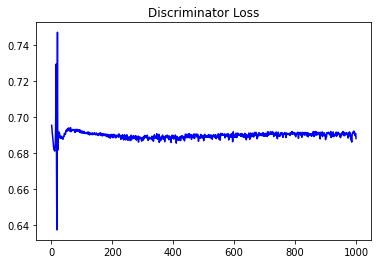

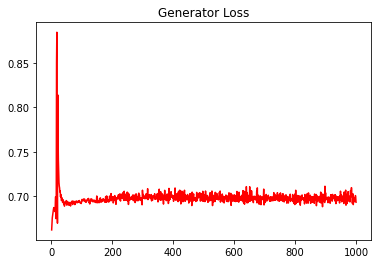

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1566193347199138


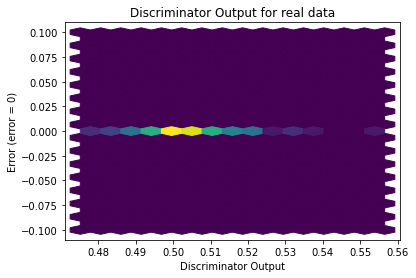

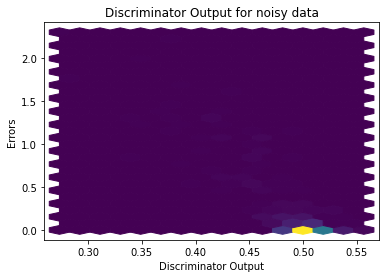

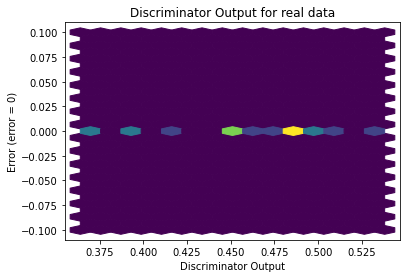

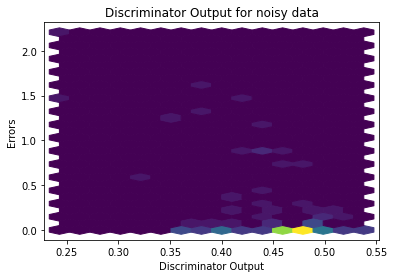

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


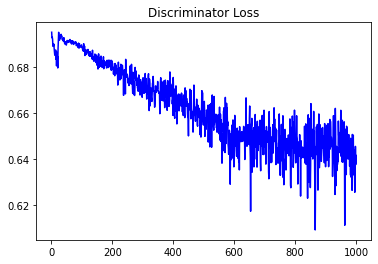

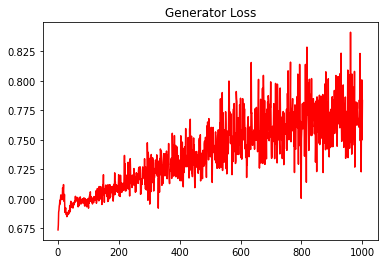

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2175846540836279


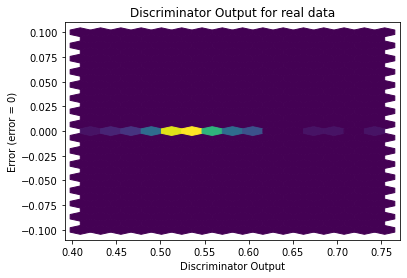

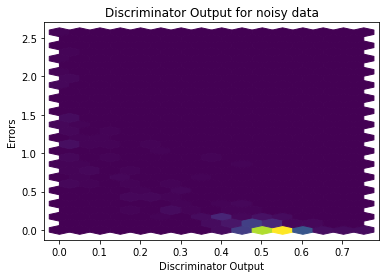

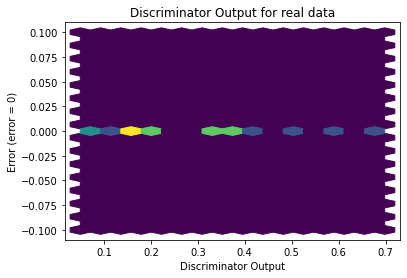

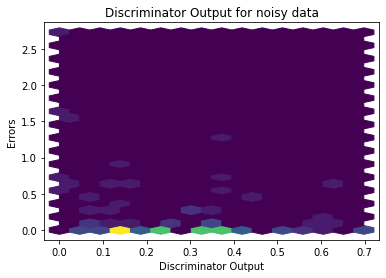

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1817]], requires_grad=True)
